In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import keras
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

In [2]:
data=pd.read_csv('default.csv',header=1,index_col=0)

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
data.isnull()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###### The data has been pre-processed by embarking the categorcial features in the above step

In [6]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###### There are no null values present in the data in any column

#### y is the target variable and the variable X is the dataframe of all independent variables

In [7]:
y=data['default payment next month']
X=data.drop('default payment next month',axis=1)

In [8]:
np.random.seed(1) # set random state
nan_matrix = np.random.random(X.shape)<0.06  # 0.05~0.1, (5~10%) whatever you want
nan_matrix

## Check [True/Total cells] ratio
unique, counts = np.unique(nan_matrix, return_counts=True) # There's a count function in unique
print(dict(zip(unique, counts))) # combine 2 nparray to a dictionary
print('ratio:',counts[1]/counts.sum())

## Set nan_matrix as condition to apply pd.mask changing X matrix with 6% NaN
X = X.mask(nan_matrix) # Note, second argument is 'other = something you want to substitute', but we left nothing here to generate NaN when nan_matrix cells are True.
X

{False: 648600, True: 41400}
ratio: 0.06


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2.0,NaN,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,NaN,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2.0,2.0,2.0,NaN,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,NaN,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,NaN,...,13559.0,14331.0,14948.0,15549.0,1518.0,NaN,1000.0,1000.0,1000.0,5000.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,NaN,-1.0,0.0,0.0,...,35835.0,NaN,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [9]:
X.isnull().sum()

LIMIT_BAL    1811
SEX          1800
EDUCATION    1806
MARRIAGE     1801
AGE          1802
PAY_0        1713
PAY_2        1774
PAY_3        1819
PAY_4        1798
PAY_5        1748
PAY_6        1862
BILL_AMT1    1790
BILL_AMT2    1731
BILL_AMT3    1847
BILL_AMT4    1790
BILL_AMT5    1810
BILL_AMT6    1777
PAY_AMT1     1879
PAY_AMT2     1818
PAY_AMT3     1837
PAY_AMT4     1816
PAY_AMT5     1822
PAY_AMT6     1749
dtype: int64

# Data prepration
### 1 - Split

In [10]:
from sklearn.model_selection import train_test_split

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


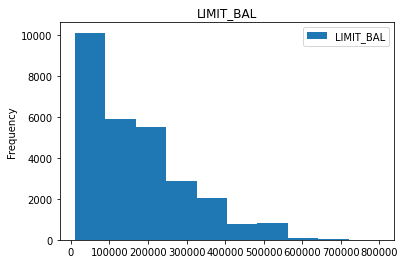

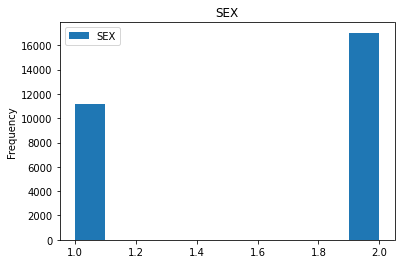

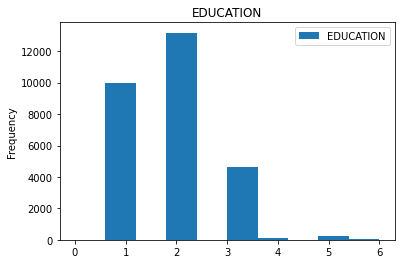

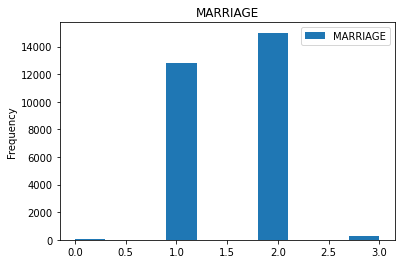

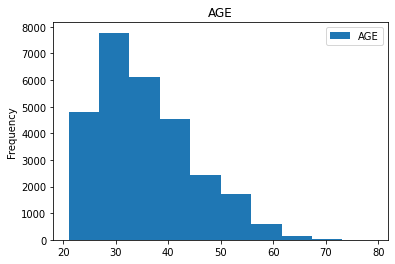

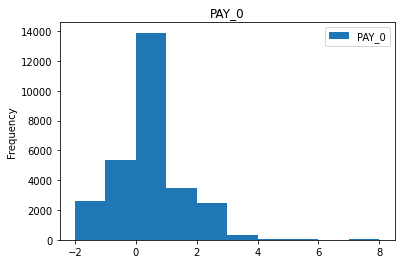

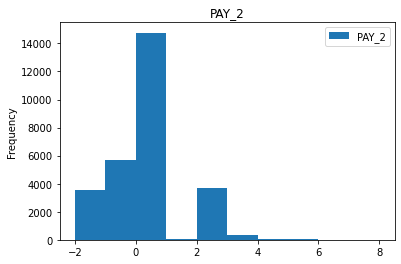

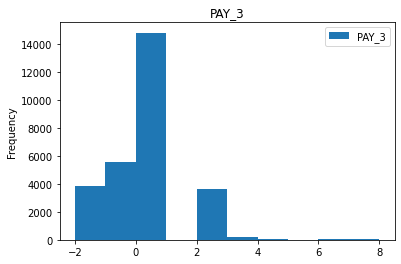

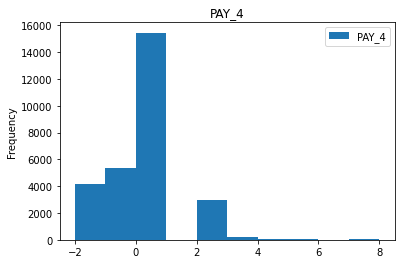

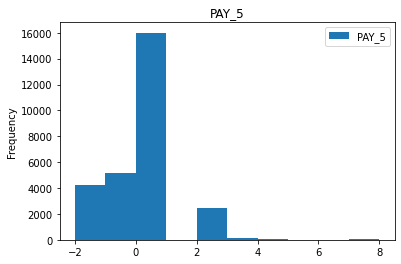

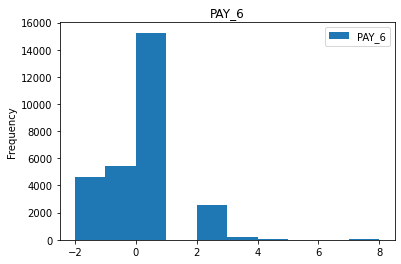

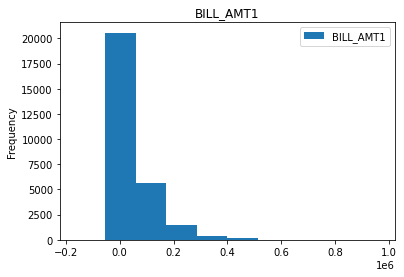

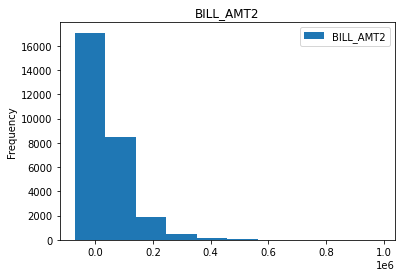

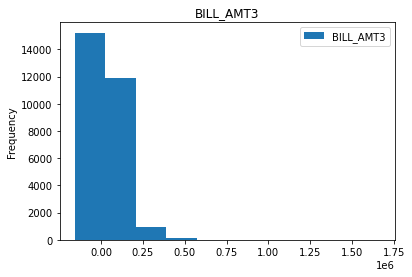

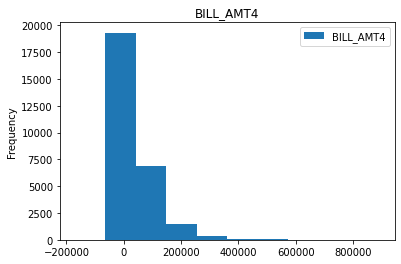

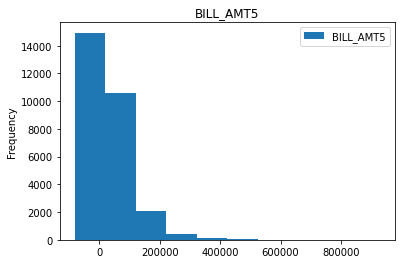

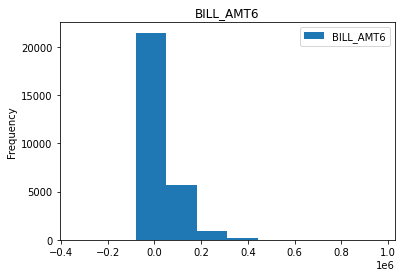

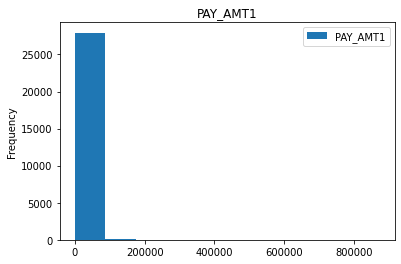

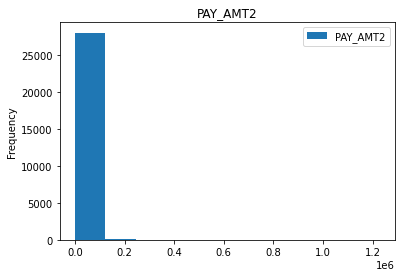

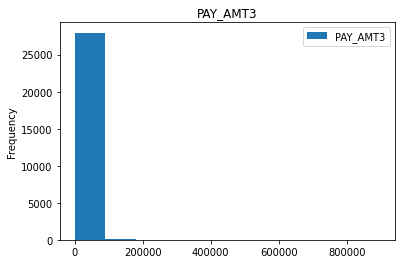

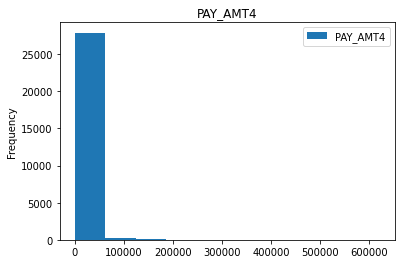

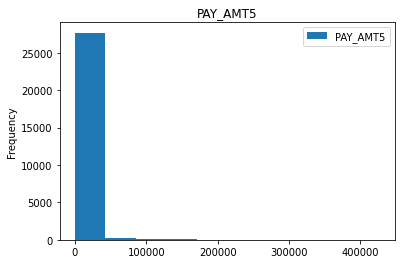

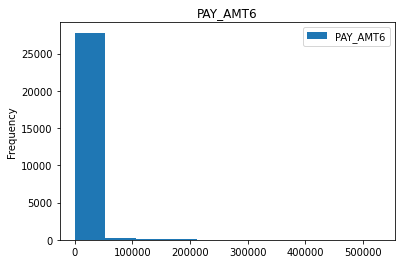

In [11]:
%matplotlib inline
for col in X.columns:
    X.plot(y = col, kind = 'hist', title = col, legend = 'none')

### Data Imputation:

In [12]:
cols=['EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]

In [13]:
for col in np.setdiff1d(X.columns, cols):
    pd_col = pd.cut(X_train_orig[col], np.linspace(X_train_orig[col].min(), X_train_orig[col].max(), 5))
    interval = pd_col.value_counts().index[0]
    mean = X_train_orig[col][(X_train_orig[col] > interval.left) & (X_train_orig[col] <= interval.right)].mean()
    X_train_orig[col].fillna(mean, inplace = True)
    X_test_orig[col].fillna(mean, inplace = True)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [14]:
for col in cols:
    mean = X_train_orig[col].mean()
    X_train_orig[col].fillna(mean, inplace = True)
    X_test_orig[col].fillna(mean, inplace = True)

In [15]:
X_train_orig_df = pd.DataFrame(X_train_orig, columns= X.columns)
for col in X_train_orig_df.columns:
    print(X_train_orig_df[col].count())

22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500
22500


In [18]:
X_train_orig['MARRIAGE'].unique()

array([2.        , 1.        , 1.55341961, 3.        , 0.        ])

### 3- Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

# Hard Voting

In [48]:
log_clf = LogisticRegression(random_state= 0, C = 10, max_iter = 1000)
log_clf.fit(X_train, y_train)

dt_clf = DecisionTreeClassifier(criterion='gini',max_depth = 3, random_state = 0)
dt_clf.fit(X_train, y_train)

svm_clf = SVC(C= 10, kernel= 'rbf', probability = True, random_state= 0)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%accuracy_score(y_test, y_pred))


LogisticRegression 0.8136
DecisionTreeClassifier 0.8253
SVC 0.8161
VotingClassifier 0.8231


# Soft Voting

In [49]:
log_clf = LogisticRegression(random_state= 0, C = 10, max_iter = 1000)
log_clf.fit(X_train, y_train)

dt_clf = DecisionTreeClassifier(criterion='gini',max_depth = 3, random_state = 0)
dt_clf.fit(X_train, y_train)

svm_clf = SVC(C= 10, kernel= 'rbf', probability = True, random_state= 0)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%accuracy_score(y_test, y_pred))

LogisticRegression 0.8136
DecisionTreeClassifier 0.8253
SVC 0.8161
VotingClassifier 0.8237


# Bagging

In [41]:
dt_clf = DecisionTreeClassifier(criterion='gini',max_depth = 3, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=0.5, max_features=0.3, 
                            bootstrap=True,n_jobs=-1, random_state=0, oob_score = True)

bag_clf.fit(X_train, y_train)
print('Train score: %.6f'%bag_clf.score(X_train, y_train))
print('Test score: %.6f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.6f'%bag_clf.oob_score_)

Train score: 0.799733
Test score: 0.800267
Out-of-bag score: 0.799067


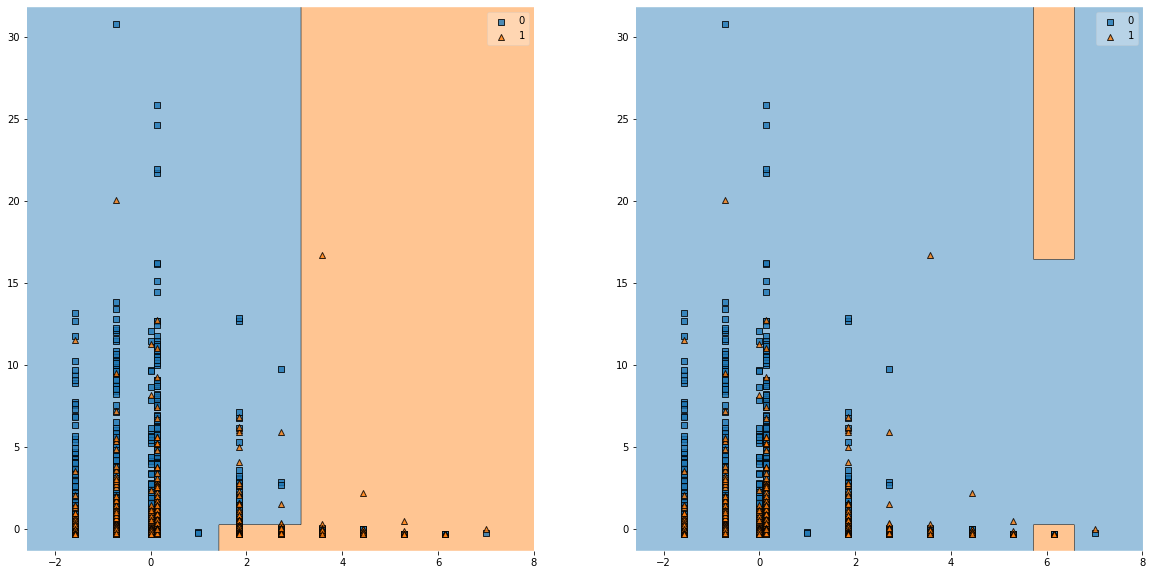

In [42]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

X_b = X_train[200:, [7,22]]
y_train_arr=y_train.to_numpy(y_train)
y_b = y_train_arr[200:]
dt_clf.fit(X_b, y_b)
bag_clf.fit(X_b, y_b)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig = plot_decision_regions(clf = dt_clf, X = X_b, y = y_b, ax=axes[0])
fig = plot_decision_regions(clf = bag_clf, X = X_b, y = y_b, ax=axes[1])

In [39]:
lgr = LogisticRegression(C= 10, penalty='l1', solver= 'liblinear',random_state=0)
bag_lgr = BaggingClassifier(lgr, n_estimators=500, max_samples=0.5, bootstrap=True,n_jobs=-1, random_state=0, oob_score = True)

bag_lgr.fit(X_train, y_train)
print('Train score: %.6f'%bag_lgr.score(X_train, y_train))
print('Test score: %.6f'%bag_lgr.score(X_test, y_test))
print('Out-of-bag score: %.6f'%bag_lgr.oob_score_)

Train score: 0.805422
Test score: 0.813200
Out-of-bag score: 0.805156


# Pasting

In [48]:
svc=SVC(C= 10, kernel= 'rbf')
bag_svc = BaggingClassifier(svc, n_estimators=500, max_samples=0.5, bootstrap=False,n_jobs=-1, random_state=0)

bag_svc.fit(X_train, y_train)
print('Train score: %.6f'%bag_svc.score(X_train, y_train))
print('Test score: %.6f'%bag_svc.score(X_test, y_test))

Train score: 0.838533
Test score: 0.818000


In [54]:
knn=KNeighborsClassifier(n_neighbors= 9)
bag_knn = BaggingClassifier(knn, n_estimators=500, max_samples=0.5, bootstrap=False,n_jobs=-1, random_state=0)

bag_knn.fit(X_train, y_train)
print('Train score: %.6f'%bag_knn.score(X_train, y_train))
print('Test score: %.6f'%bag_knn.score(X_test, y_test))

Train score: 0.822267
Test score: 0.808400


# AdaBoost Boosting

In [22]:
ada_dtc = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini',max_depth=3), n_estimators=50, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)

ada_dtc.fit(X_train, y_train)
print('Train score: %.6f'%ada_dtc.score(X_train, y_train))
print('Test score: %.6f'%ada_dtc.score(X_test, y_test))

Train score: 0.826756
Test score: 0.821067


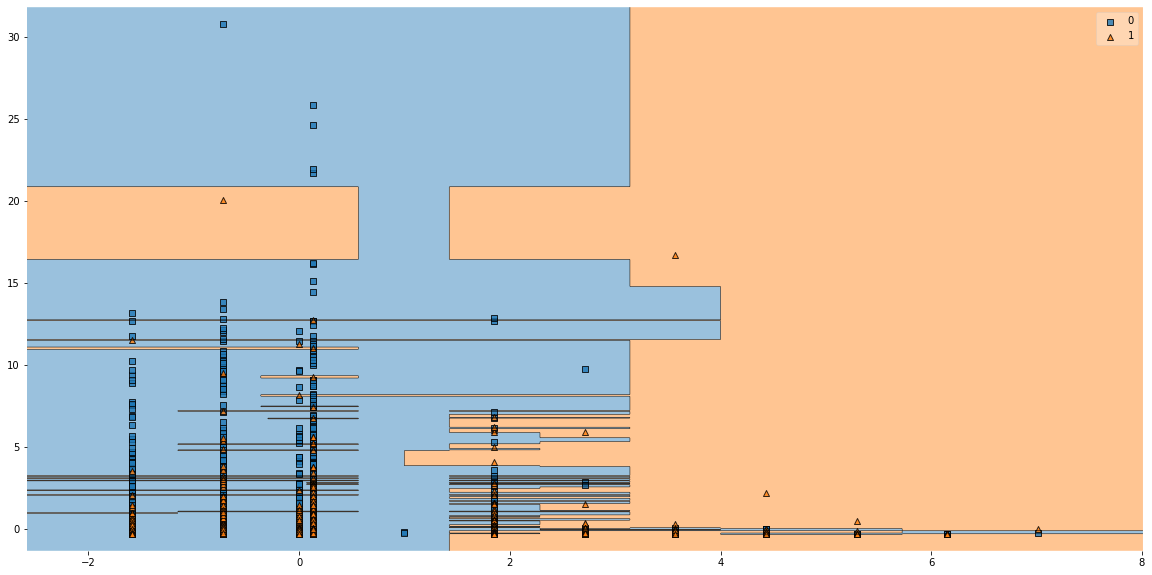

In [28]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

X_b = X_train[200:, [7,22]]
y_train_arr=y_train.to_numpy(y_train)
y_b = y_train_arr[200:]
ada_dtc.fit(X_b, y_b)
plt.subplots(figsize=(20, 10))

fig = plot_decision_regions(clf = ada_dtc, X = X_b, y = y_b)

In [46]:
ada_lgr = AdaBoostClassifier(LogisticRegression(C= 10), n_estimators=500, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)

ada_lgr.fit(X_train, y_train)
print('Train score: %.6f'%ada_lgr.score(X_train, y_train))
print('Test score: %.6f'%ada_lgr.score(X_test, y_test))

Train score: 0.797156
Test score: 0.802800


# Gradient Boosting with GridSearchCV:

In [23]:
param_grid={'learning_rate':[0.1,0.5,0.7,1.0],'n_estimators':[50,100,300]}
grid_search_bgc=GridSearchCV(GradientBoostingClassifier(max_depth=3, random_state=0),param_grid,return_train_score=True,n_jobs=-1)
grid_search_bgc.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 300]},
             return_train_score=True)

In [24]:
print("Best parameters: {}".format(grid_search_bgc.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search_bgc.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation score: 0.818267


# PCA

In [18]:
pca = PCA(n_components = 0.95)
X_train_r = pca.fit_transform(X_train)
X_test_r = pca.transform(X_test)

In [19]:
pca.explained_variance_ratio_.sum()

0.9504106246990034

In [20]:
np.shape(X_train_r)

(22500, 16)

# KNN Classification:

In [26]:
## Grid Search with Cross- Validation
max_class = np.max(np.bincount(y))
param_grid_knn={'n_neighbors': range(1, 10)}
print(" Parameter grid for KNN is: {}".format(param_grid_knn))

 Parameter grid for KNN is: {'n_neighbors': range(1, 10)}


In [27]:
grid_search_knn=GridSearchCV(KNeighborsClassifier(),param_grid_knn,return_train_score=True,n_jobs=-1)

In [28]:
grid_search_knn.fit(X_train_r,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10)}, return_train_score=True)

In [29]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.80


In [30]:
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_r, y_train)
    train_score_array.append(knn.score(X_train_r, y_train))
    test_score_array.append(knn.score(X_test_r, y_test))

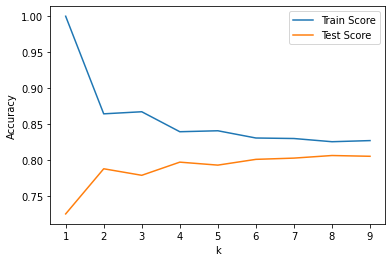

In [31]:
import matplotlib.pyplot as plt
x_axis = range(1,10)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score')
plt.plot(x_axis, test_score_array, label = 'Test Score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

### Train and Test scores for the best evaluated KNN Regression Model Parameters

In [32]:
knn = KNeighborsClassifier(9)
knn.fit(X_train_r, y_train)
ypred = grid_search_knn.predict(X_test_r)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[5519 1109]
 [ 349  523]]
0.4177316293929713


# Logisitic Regression:

In [33]:
param_grid_log ={'C':[0.01, 0.1, 1, 10, 100],
                'penalty':['l1','l2'],
                'solver':['lbfgs','liblinear']}
print(" Parameter grid for logistic regression is: {}".format(param_grid_log))

 Parameter grid for logistic regression is: {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'liblinear']}


In [34]:
grid_search_log=GridSearchCV(LogisticRegression(max_iter=1000),param_grid_log,return_train_score=True,n_jobs=-1)

###### Increased the Maximum number of interations in Logistic Regression as the model was converging

In [35]:
grid_search_log.fit(X_train_r,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True)

In [36]:
print("Best parameters: {}".format(grid_search_log.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_log.best_score_))

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.80


### Train and Test scores for the best evaluated Logistic Regression Model Parameters

In [37]:
log = LogisticRegression(penalty = 'l1',solver='liblinear', C = 10)
log.fit(X_train_r, y_train)
print(log.score(X_train_r, y_train))
print(log.score(X_test_r, y_test))

0.8051555555555555
0.8124


In [38]:
c_range = [0.01, 0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train_r, y_train)
    log_l2.fit(X_train_r, y_train)
    train_score_l1.append(log_l1.score(X_train_r, y_train))
    train_score_l2.append(log_l2.score(X_train_r, y_train))
    test_score_l1.append(log_l1.score(X_test_r, y_test))
    test_score_l2.append(log_l2.score(X_test_r, y_test))

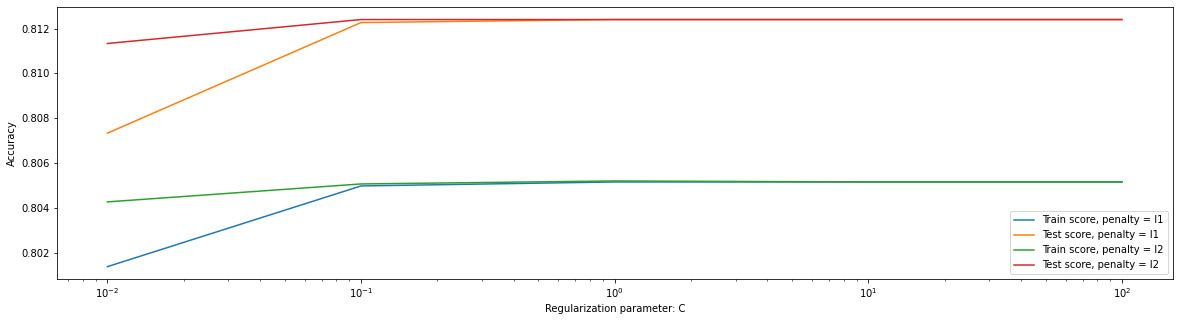

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [40]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_train_r[200:, [7,15]]
y_b = y_train[200:]

lreg = LogisticRegression(C = 0.1, penalty = 'l2')
lreg.fit(X_b, y_b) 

LogisticRegression(C=0.1)

Text(0, 0.5, 'worst area')

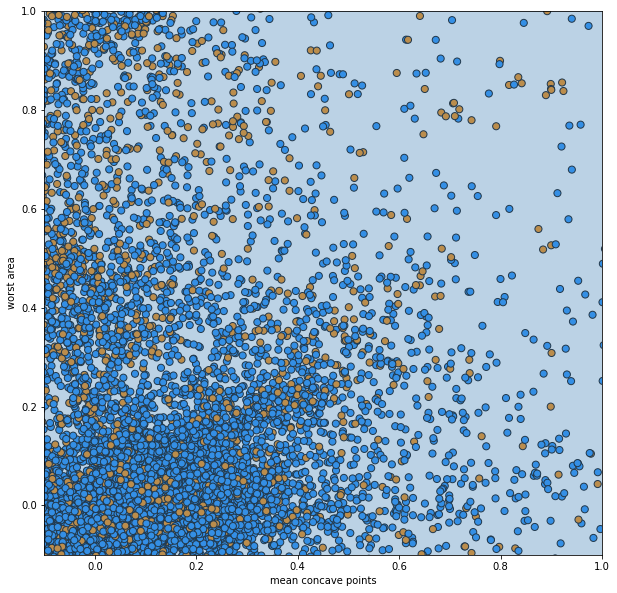

In [41]:
import matplotlib 
import numpy as np

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize = (10,10))
xaxis = np.linspace(0,1, 100)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')


x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')

# Linear Support Vector Machine:

In [43]:
param_grid_lsvc ={'C':[0.01, 0.1, 1, 10, 100]}
print(" Parameter grid for linear SVC is: {}".format(param_grid_lsvc))

 Parameter grid for linear SVC is: {'C': [0.01, 0.1, 1, 10, 100]}


In [44]:
grid_search_lsvc=GridSearchCV(LinearSVC(max_iter=10000),param_grid_lsvc,return_train_score=True,n_jobs=-1)

In [45]:
grid_search_lsvc.fit(X_train_r,y_train)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(estimator=LinearSVC(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [46]:
print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.80


### Train and Test scores for the best evaluated Linear Support Vector Regression Model Parameters

In [47]:
lsvc = LinearSVC(C=10,max_iter=10000)
lsvc.fit(X_train_r, y_train)
print(lsvc.score(X_train_r, y_train))
print(lsvc.score(X_test_r, y_test))

0.7966666666666666
0.8032


c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Decision Tree Classifier:

In [21]:
param_grid_dtc={'criterion':['gini','entropy'],
               'max_depth':[1,2,3,4,5,6,7,8,9,10]}
print(" Parameter grid for Decision Tree Classifier is: {}".format(param_grid_dtc))

 Parameter grid for Decision Tree Classifier is: {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [22]:
grid_search_dtc=GridSearchCV(DecisionTreeClassifier(),param_grid_dtc,return_train_score=True,n_jobs=-1)

In [23]:
grid_search_dtc.fit(X_train_r,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [24]:
print("Best parameters: {}".format(grid_search_dtc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtc.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 5}
Best cross-validation score: 0.81


### Train and Test scores for the best evaluated Kernel Support Vector Regression Model Parameters

In [25]:
dtr = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtr.fit(X_train_r, y_train)
print(dtr.score(X_train_r, y_train))
print(dtr.score(X_test_r, y_test))

0.8028444444444445
0.8058666666666666


<AxesSubplot:>

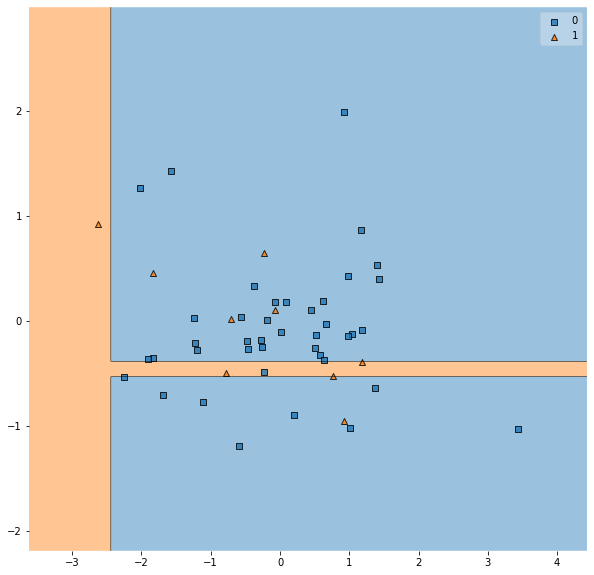

In [26]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train_r[:50,[2,10]]
y_b = y_train[:50]
a = np.array(y_b.values.tolist())

plt.subplots(figsize = (10,10))
dtree = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree.fit(X_b, a)

plot_decision_regions(X_b, a, clf = dtree)

### Comparing all the classifier's cross-validation scores, it is best to use DecisionTreeClassifier for this data to predict values with accuracy

In [69]:
#### Fitting the DecisionTreeClassifier on the whole dataset

In [45]:
dtr = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtr.fit(X_train_r, y_train)
print(dtr.score(X_train_r, y_train))
print(dtr.score(X_test_r, y_test))

0.8185777777777777
0.8246666666666667


# Conclusion:

## We can see that the model is not overfitting the data. The training score and test score are almost equal which means that the model correctly fits the data and it does not overfit or underfit the data. So PCA performs better in this classification task.

# Deep Learning Model:

In [39]:
# initial shape of the datasets
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: " , X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (22500, 23)
y_train shape:  (22500,)
X_test shape:  (7500, 23)
y_test shape:  (7500,)


In [43]:
# prepare the targey values
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

In [44]:
Y_train.shape

(22500, 2)

In [45]:
# step 1: building the model
model1 = Sequential()
# input layer
model1.add(Dense(32, input_dim = X_train.shape[1], activation = 'sigmoid', kernel_initializer= 'zeros', name = 'input_layer'))
# hidden layers
model1.add(Dense(16, activation= 'relu',  name = 'hidden_layer'))
# output layers
model1.add(Dense(Y_train.shape[1], activation= 'softmax', name = 'output_layer'))

model1.summary()

# step 2: building the computational graph - compile
model1.compile(loss = 'categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

# step 3: training the model - fit
model1.fit(X_train, Y_train, epochs = 20, batch_size = 128)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                768       
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                528       
_________________________________________________________________
output_layer (Dense)         (None, 2)                 34        
Total params: 1,330
Trainable params: 1,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
176/176 [==============================] - 0s 980us/step - loss: 0.4912 - accuracy: 0.7890
Epoch 2/20
176/176 [==============================] - 0s 941us/step - loss: 0.4627 - accuracy: 0.8036
Epoch 3/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.8076
Epoch 4/20
176/176 [==============================] - 0s 782us/step - loss: 0.

In [46]:
# step 4: evaluating the model
model1.evaluate(X_train, Y_train)

704/704 [==============================] - 0s 608us/step - loss: 0.4352 - accuracy: 0.8174


[0.43523433804512024, 0.8173778057098389]

In [47]:
model1.evaluate(X_test, Y_test)

235/235 [==============================] - 0s 684us/step - loss: 0.4291 - accuracy: 0.8247


[0.42912226915359497, 0.8246666789054871]